In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%pylab inline
plt.rcParams['figure.figsize']= 10,7.5
plt.rcParams['axes.grid']= True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [2]:
os.getcwd()

'C:\\Users\\Freeware Sys'

In [3]:
os.chdir("F:\Analytx Labs\DSP Class 13\DSP Class 13 files\DSP Class 13 files\Case Study - Housing Example")

In [4]:
os.getcwd()

'F:\\Analytx Labs\\DSP Class 13\\DSP Class 13 files\\DSP Class 13 files\\Case Study - Housing Example'

In [5]:
Data= pd.read_csv("House_Prices.csv")

In [6]:
Data.sample(5)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
64,65,130300,1860,3,2,2,No,West
89,90,97800,2010,2,2,4,No,North
63,64,120500,1910,2,3,2,No,East
85,86,188300,2250,4,3,2,Yes,West
91,92,116500,2150,3,2,2,No,East


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [8]:
Data.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [9]:
#Segregating numeric columns from data
Numeric_Data= Data.select_dtypes(include= [np.number])
Numeric_Data.head(5)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,1,114300,1790,2,2,2
1,2,114200,2030,4,2,3
2,3,114800,1740,3,2,1
3,4,94700,1980,3,2,3
4,5,119800,2130,3,3,3


In [10]:
# Segregating categorical values
String_Data= Data.select_dtypes(include=[np.object])
String_Data.head(5)

,Brick,Neighborhood
0,No,East
1,No,East
2,No,East
3,No,East
4,No,East


In [11]:
#Discovering outliers on numeric data using Z 
from scipy import stats
import numpy as np

In [12]:
z= np.abs(stats. zscore(Numeric_Data))
print(z)

[[1.71857161 0.6025848  1.00091648 1.41532739 0.86893879 0.54276944]
 [1.69150749 0.60632122 0.13790405 1.35050324 0.86893879 0.396075  ]
 [1.66444337 0.58390272 1.23817076 0.03241208 0.86893879 1.48161388]
 [1.63737925 1.33492252 0.09935023 0.03241208 0.86893879 0.396075  ]
 [1.61031513 0.39708187 0.6124126  0.03241208 1.08236235 0.396075  ]
 [1.58325101 0.59137555 1.04836734 0.03241208 0.86893879 0.54276944]
 [1.55618689 0.79109872 0.81111306 0.03241208 1.08236235 0.396075  ]
 [1.52912277 0.75747096 0.75476517 1.35050324 0.86893879 0.54276944]
 [1.50205865 0.41950037 0.51751089 1.35050324 0.86893879 0.396075  ]
 [1.47499453 0.98743575 1.28562162 0.03241208 1.08236235 0.396075  ]
 [1.44793041 0.07744308 0.13790405 0.03241208 0.86893879 0.396075  ]
 [1.42086629 0.27751653 0.62130964 1.41532739 0.86893879 0.54276944]
 [1.39380217 1.03974559 0.43150622 0.03241208 0.86893879 1.33491944]
 [1.36673805 0.15421477 0.70731432 0.03241208 1.08236235 2.27376387]
 [1.33967393 1.73267578 2.79515196

In [13]:
threshold= 3
print (np.where(z>3))

(array([ 47, 103, 116], dtype=int64), array([5, 1, 4], dtype=int64))


In [14]:
print(z[47],[5])

[0.44655798 1.49932487 0.23280576 0.03241208 0.86893879 3.21260831] [5]


In [15]:
Numeric_Data.shape

(128, 6)

In [16]:
Final_Numeric_Data= Numeric_Data[(z<3).all (axis=1)]

In [17]:
Final_Numeric_Data.shape

(125, 6)

In [18]:
Final_Numeric_Data.head(5)


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,1,114300,1790,2,2,2
1,2,114200,2030,4,2,3
2,3,114800,1740,3,2,1
3,4,94700,1980,3,2,3
4,5,119800,2130,3,3,3


In [19]:
# We don not have any null values in numeric data
print(Final_Numeric_Data.isnull().values.sum())

0


In [20]:
#Handling categorical varibales
# Check for null values
print(String_Data.isnull().values.sum())

0


In [21]:
#checking the distrinct values for each variable
print(String_Data['Brick'].value_counts())

No     86
Yes    42
Name: Brick, dtype: int64


In [22]:
print(String_Data['Neighborhood'].value_counts())

East     45
North    44
West     39
Name: Neighborhood, dtype: int64


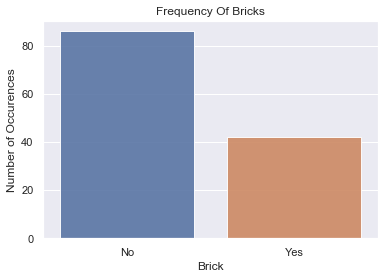

In [23]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
Brick_Count=String_Data['Brick'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Brick_Count.index, Brick_Count.values, alpha=0.9)
plt.title("Frequency Of Bricks")
plt.ylabel("Number of Occurences", fontsize=12)
plt.xlabel("Brick", fontsize=12)
plt.show()

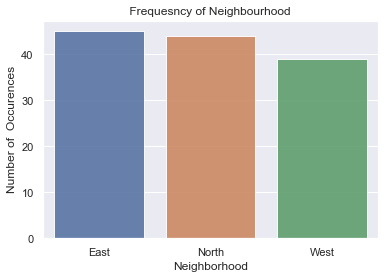

In [24]:
Neighbourhood_Count= String_Data['Neighborhood'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Neighbourhood_Count.index, Neighbourhood_Count.values, alpha=0.9)
plt.title(" Frequesncy of Neighbourhood ")
plt.ylabel("Number of  Occurences", fontsize=12)
plt.xlabel("Neighborhood", fontsize=12)
plt.show()

In [25]:
# Replace the categorical values with numbers
replace_map={'Brick': {'No':0, 'Yes': 1}, 'Neighborhood': {'East':3, 'North':4, 'West':5} }

In [26]:
#We will take a backup of the original file
String_Data_Replace= String_Data.copy()

String_Data_Replace.head(5)

,Brick,Neighborhood
0,No,East
1,No,East
2,No,East
3,No,East
4,No,East


In [27]:
String_Data_Replace.replace(replace_map, inplace= True)
print(String_Data_Replace. head(10))

   Brick  Neighborhood
0      0             3
1      0             3
2      0             3
3      0             3
4      0             3
5      0             4
6      1             5
7      0             5
8      0             3
9      0             3


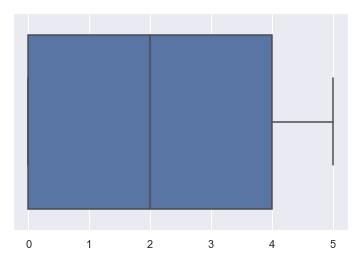

In [34]:
#testing for outliers in categorical data
import seaborn as sns
sns.boxplot(x=String_Data_Replace)

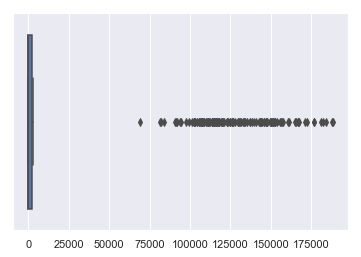

In [28]:
#testing for outliers in numeric data
import seaborn as sns
sns.boxplot(x=Final_Numeric_Data)

In [29]:
# Taking Backup of numerical data
Final_Numeric_Data_Replace= Final_Numeric_Data.copy()
Final_Numeric_Data_Replace.head(5)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,1,114300,1790,2,2,2
1,2,114200,2030,4,2,3
2,3,114800,1740,3,2,1
3,4,94700,1980,3,2,3
4,5,119800,2130,3,3,3


In [30]:
print(String_Data_Replace.isnull().values.sum())

0


In [31]:
Sample= pd.concat([String_Data_Replace, Final_Numeric_Data_Replace], axis =1)
Sample.sample(10)

,Brick,Neighborhood,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
27,0,3,28.0,99300.0,1700.0,3.0,2.0,2.0
97,1,3,98.0,126800.0,2000.0,2.0,2.0,1.0
11,1,3,12.0,123000.0,1870.0,2.0,2.0,2.0
63,0,3,64.0,120500.0,1910.0,2.0,3.0,2.0
58,0,5,59.0,138100.0,1840.0,3.0,3.0,1.0
60,0,5,61.0,180900.0,2200.0,3.0,3.0,1.0
54,0,4,55.0,81300.0,1650.0,3.0,2.0,3.0
74,0,5,75.0,144200.0,2140.0,3.0,3.0,3.0
111,0,4,112.0,114900.0,1740.0,2.0,2.0,2.0
16,1,3,17.0,147100.0,2190.0,3.0,3.0,4.0


In [32]:
print(Sample.isnull().values.sum())

18


In [33]:
Sample= Sample.dropna(axis=0)



In [34]:
Sample.sample(10)


,Brick,Neighborhood,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
7,0,5,8.0,150700.0,2160.0,4.0,2.0,2.0
21,0,4,22.0,113800.0,2000.0,3.0,2.0,4.0
105,0,5,106.0,146900.0,2530.0,4.0,3.0,4.0
45,0,3,46.0,103200.0,1810.0,3.0,2.0,3.0
27,0,3,28.0,99300.0,1700.0,3.0,2.0,2.0
6,1,5,7.0,151600.0,1830.0,3.0,3.0,3.0
13,1,4,14.0,126300.0,2150.0,3.0,3.0,5.0
85,1,5,86.0,188300.0,2250.0,4.0,3.0,2.0
96,0,3,97.0,133300.0,2440.0,3.0,3.0,3.0
83,0,3,84.0,147700.0,2410.0,3.0,3.0,2.0


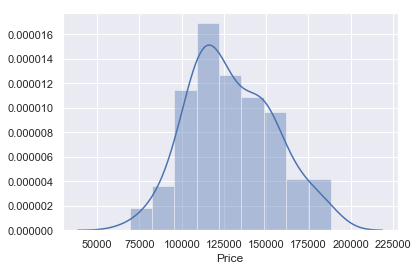

In [35]:
import seaborn as sns 
sns.distplot(Sample.Price)

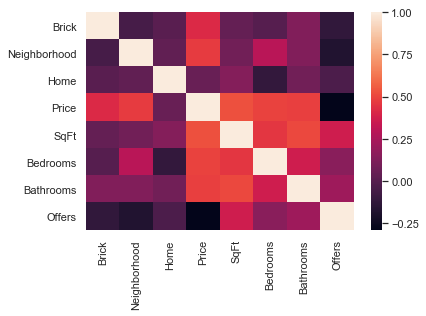

In [36]:
#Check collinearity 
corr= Sample.corr()
sns.heatmap(corr)

In [37]:
#Training Linera Regression Model
X= Sample[['Brick','Neighborhood','Home','SqFt','Bedrooms','Offers']]
Y= Sample['Price']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
#Import train test split, here 40% of data goes into training and  remaining into main.
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.4, random_state=101)

In [48]:
#Creating and training the model
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,Y,
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [61]:
print (len (train_X))
print ( len (test_X))

87
38


In [62]:
import statsmodels.api as sm

In [63]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     63.99
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           1.74e-28
Time:                        15:07:40   Log-Likelihood:                -930.01
No. Observations:                  87   AIC:                             1874.
Df Residuals:                      80   BIC:                             1891.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.363e+04   1.19e+04     -3.658   

In [65]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

Parameters:  const          -43627.031788
Brick           22303.954336
Neighborhood    10493.291459
Home               -5.830410
SqFt               64.095959
Bedrooms         8146.176941
Offers         -10204.929613
dtype: float64
R2:  0.827562283911541


In [67]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 9404.872452504762
MSE: 136007765.2677575
RMSE: 11662.236718046735


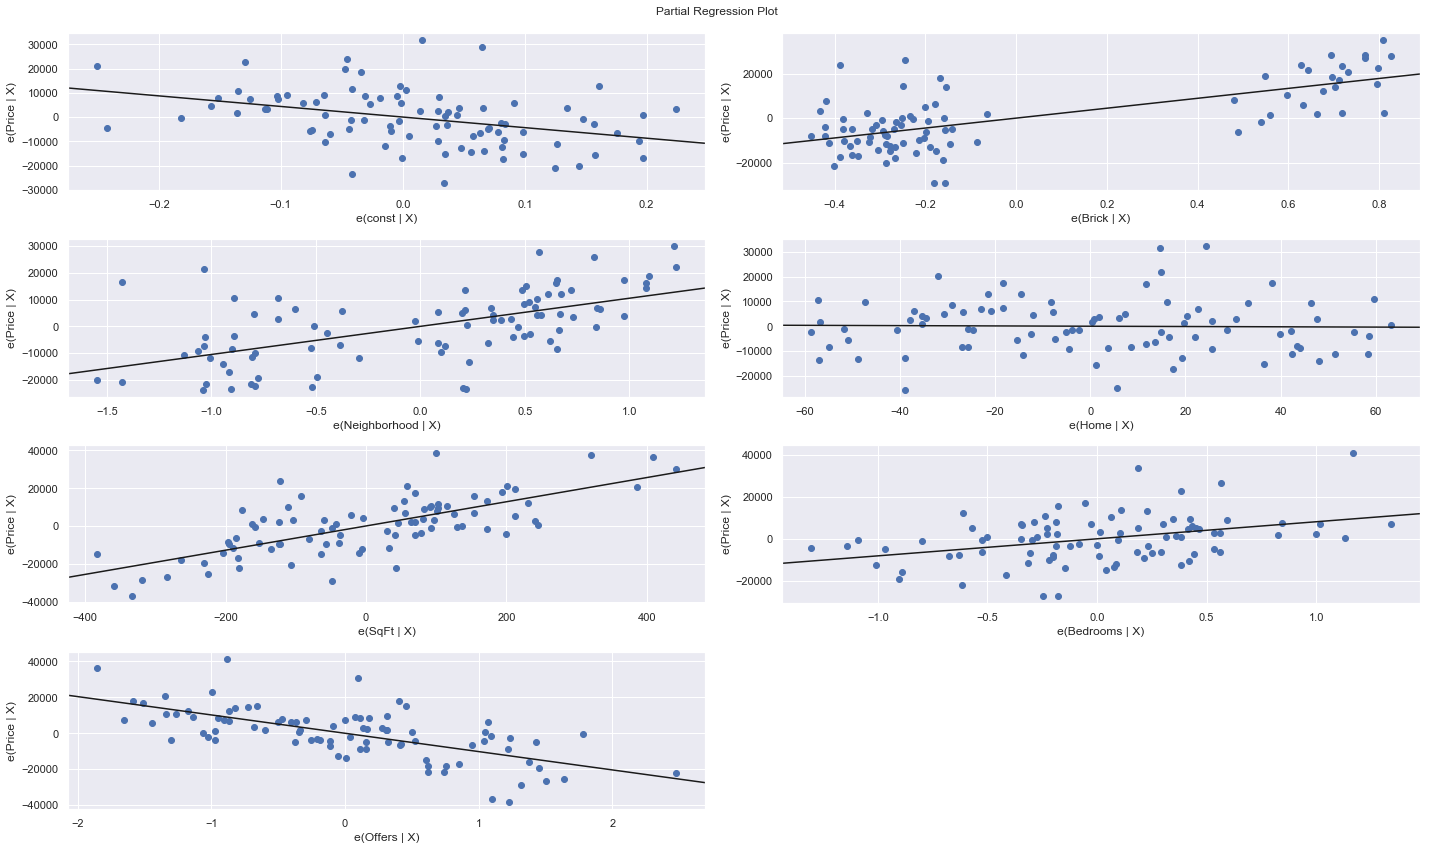

In [84]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(lm, fig=fig)

In [ ]:
#Steps for implementing VIF

In [85]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
Sample.head(10)

,Brick,Neighborhood,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,0,3,1.0,114300.0,1790.0,2.0,2.0,2.0
1,0,3,2.0,114200.0,2030.0,4.0,2.0,3.0
2,0,3,3.0,114800.0,1740.0,3.0,2.0,1.0
3,0,3,4.0,94700.0,1980.0,3.0,2.0,3.0
4,0,3,5.0,119800.0,2130.0,3.0,3.0,3.0
5,0,4,6.0,114600.0,1780.0,3.0,2.0,2.0
6,1,5,7.0,151600.0,1830.0,3.0,3.0,3.0
7,0,5,8.0,150700.0,2160.0,4.0,2.0,2.0
8,0,3,9.0,119200.0,2110.0,4.0,2.0,3.0
9,0,3,10.0,104000.0,1730.0,3.0,3.0,3.0


In [88]:
#Run multiple regression
%%capture
#gather features
features= "+".join(Sample.columns-["Price"])

#get X and Y features based on the regression

y,X=dmatrices('Price~' + features, Sample, return_type= 'dataframe' )

UsageError: Line magic function `%%capture` not found.


In [89]:
#Calculate VIF Factors
vif= pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [90]:
#Inspect VIF Factors
vif.round(1) # We need to drop Neihborhood, SqFt, Bedrooms

,VIF Factor,features
0,1.5,Brick
1,24.6,Neighborhood
2,4.3,Home
3,60.0,SqFt
4,27.5,Bedrooms
5,9.2,Offers


In [97]:
New_Data=Sample.drop(['Neighborhood','Bedrooms','SqFt'], axis =1)

In [ ]:
#Now we will use New_Data for our futher analysis

In [98]:
New_Data.head(10)

,Brick,Home,Price,Bathrooms,Offers
0,0,1.0,114300.0,2.0,2.0
1,0,2.0,114200.0,2.0,3.0
2,0,3.0,114800.0,2.0,1.0
3,0,4.0,94700.0,2.0,3.0
4,0,5.0,119800.0,3.0,3.0
5,0,6.0,114600.0,2.0,2.0
6,1,7.0,151600.0,3.0,3.0
7,0,8.0,150700.0,2.0,2.0
8,0,9.0,119200.0,2.0,3.0
9,0,10.0,104000.0,3.0,3.0


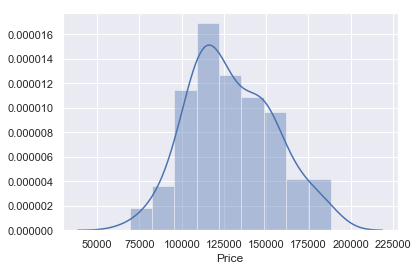

In [99]:
#Check the distribution of the New_Data
import seaborn as sns 
sns.distplot(New_Data.Price)

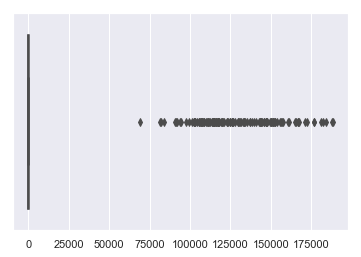

In [100]:
#Checking for outliers
import seaborn as sns
sns.boxplot(x=New_Data)

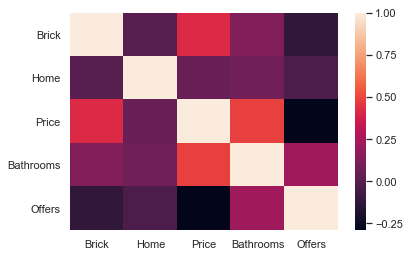

In [101]:
#Check collinearity 
corr= New_Data.corr()
sns.heatmap(corr)

In [102]:
#Training Linera Regression Model
X= New_Data[['Brick','Home','Offers']]
Y= New_Data['Price']

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
#Import train test split, here 40% of data goes into training and  remaining into main.
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.4, random_state=101)

In [105]:
#Creating and training the model
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [106]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,Y,
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [107]:
print (len (train_X))
print ( len (test_X))

87
38


In [108]:
import statsmodels.api as sm

In [109]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [110]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     6.647
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           0.000445
Time:                        16:27:13   Log-Likelihood:                -997.10
No. Observations:                  87   AIC:                             2002.
Df Residuals:                      83   BIC:                             2012.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.342e+05   8799.236     15.247      0.0

In [111]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

Parameters:  const     134159.035570
Brick      20645.926626
Home          30.620707
Offers     -4501.476858
dtype: float64
R2:  0.1937134729740254


In [112]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 15485.41323476514
MSE: 390202186.7694597
RMSE: 19753.536057360965


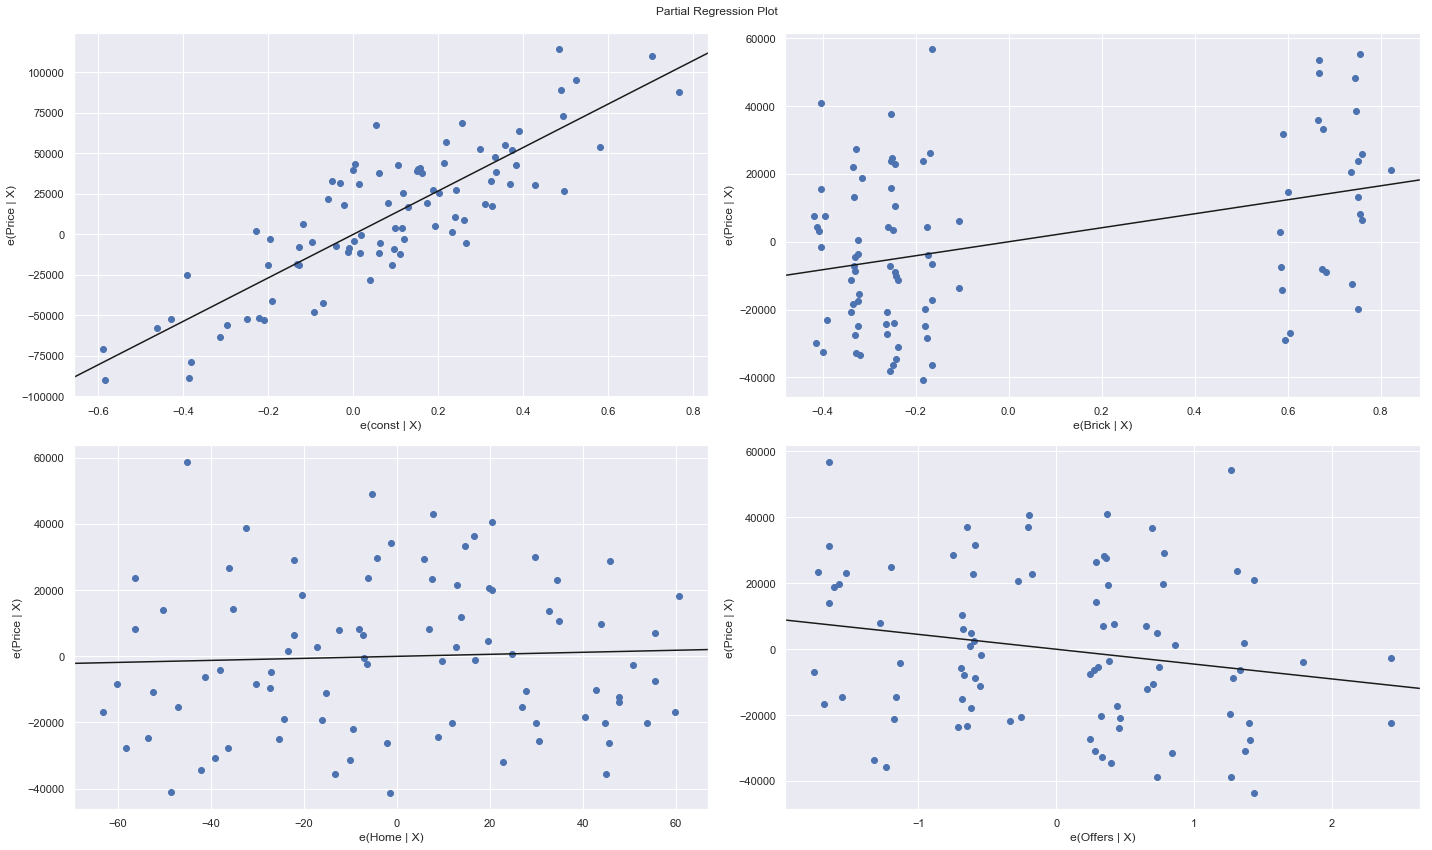

In [113]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(lm, fig=fig)

In [114]:
#Check for VIF
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
#Run multiple regression
%%capture
#gather features
features= "+".join(New_Data.columns-["Price"])

#get X and Y features based on the regression

y,X=dmatrices('Price~' + features, New_Data, return_type= 'dataframe' )

UsageError: Line magic function `%%capture` not found.


In [116]:
#Calculate VIF Factors
vif= pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [117]:
vif.round(1)

,VIF Factor,features
0,1.4,Brick
1,2.9,Home
2,2.8,Offers


In [ ]:
#Therefore Factors afftecting prices are Brick Home and Offers